DATA PREPROCESSING

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

1. Load dataset adult.csv dan buang feature yang tidak dibutuhkan serta rapikan dataset

In [39]:
df = pd.read_csv('../../../../../adult.csv')
print(df.shape)
df

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [40]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
print(df.shape)

(45222, 15)


2. Batasi dataset hanya pada data yang memiliki umur 25 - 40 tahun

In [42]:
df_new = df[(df['age'] >= 25) & (df['age'] <= 40)]
print(df_new.shape)
df_new

(19243, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48827,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
48832,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


3. Cek tipe data pada masing-masing feature dan encoding bila diperlukan

In [43]:
df_new.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [44]:
object_cols = df_new.select_dtypes(include=['object']).columns
int64_cols = df_new.select_dtypes(include=['int64']).columns

print('object columns:', object_cols)
print('int64 columns:', int64_cols)

object columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')
int64 columns: Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [46]:
df_new2 = df_new.copy()

df_new2[object_cols] = df_new2[object_cols].apply(LabelEncoder().fit_transform)
df_new2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0
11,36,0,212465,9,13,2,0,0,4,1,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48827,37,2,198216,7,12,0,12,1,4,0,0,0,40,38,0
48832,32,2,34066,0,6,2,5,0,0,1,0,0,40,38,0
48834,32,2,116138,12,14,4,12,1,1,1,0,0,11,35,0
48837,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0


4. Cek data null dan data duplicated

In [47]:
# cek data null
df_new2.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [48]:
# cek data duplikat
df_new2.duplicated().sum()

16

5. Handling miss value dan handling duplicated data jika diperlukan

In [49]:
# handling duplikat
df_new2.drop_duplicates(inplace=True)
df_new2.duplicated().sum()

0

In [50]:
df_new2.shape

(19227, 15)

6. Cek data outlier dengan visualisasikan dalam boxplot pada masing-masing feature

In [51]:
# cek data outliers
df_new2.describe()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,19227.000000,19227.000000,1.922700e+04,19227.000000,19227.000000,19227.000000,19227.000000,19227.000000,19227.000000,19227.000000,19227.000000,19227.000000,19227.000000,19227.000000,19227.000000
mean,32.584074,2.172570,1.932818e+05,10.382067,10.318354,2.556769,5.903105,1.404119,3.650908,0.688823,806.411297,84.119363,42.846986,36.276902,0.227857
std,4.535233,0.906402,1.089746e+05,3.504951,2.395364,1.418011,4.043792,1.617386,0.868646,0.462987,5872.410915,391.743955,10.565833,6.204195,0.419461
min,25.000000,0.000000,1.349200e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,2.000000,1.178330e+05,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,33.000000,2.000000,1.815280e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,36.000000,2.000000,2.427020e+05,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,47.000000,38.000000,0.000000
max,40.000000,6.000000,1.490400e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,40.000000,1.000000


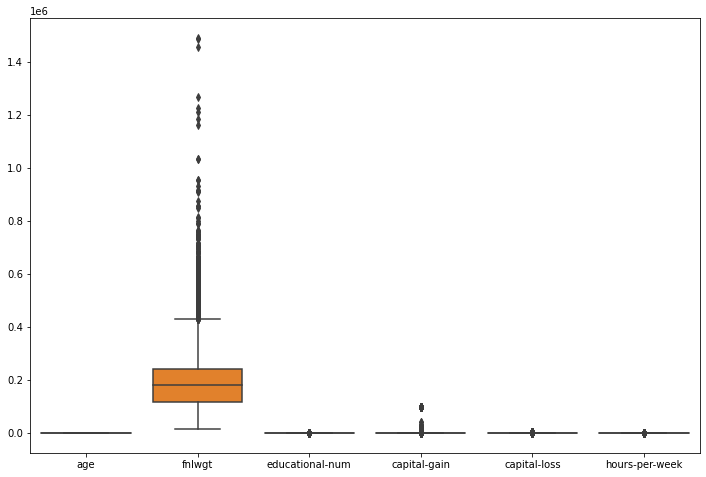

In [52]:
# bloxplot visualisasi data
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_new2[int64_cols])
plt.show()

In [53]:
df_new2['capital-loss'].quantile(0.25)

0.0

7. Handling outlier jika diperlukan

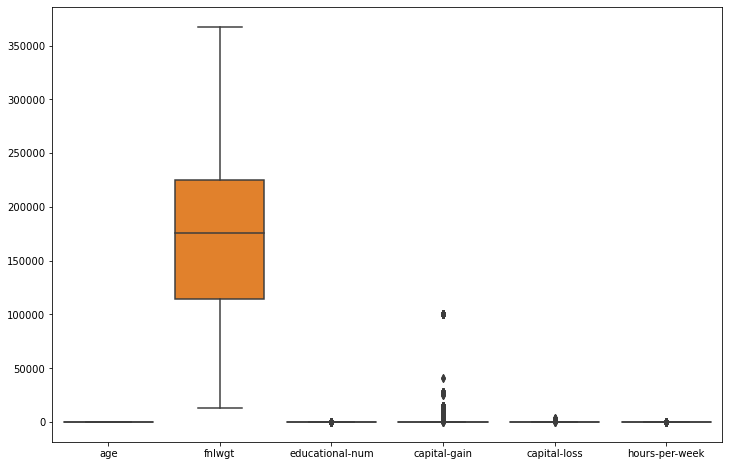

In [54]:
# handle outliers
q1 = df_new2['fnlwgt'].quantile(0.25)
q3 = df_new2['fnlwgt'].quantile(0.75)

iqr = q3 - q1
df_new3 = df_new2[df_new2['fnlwgt'] < (q3 + iqr)]

df_new3.shape
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_new3[int64_cols])
plt.show()

8. Normalisasikan data menggunakan normalisasi minmax

In [56]:
df_new4 = df_new3.copy()
scaler = MinMaxScaler()
df_new4[int64_cols] = scaler.fit_transform(df_new4[int64_cols])
df_new4

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.000000,2,0.602501,1,0.400000,4,6,3,2,1,0.0,0.0,0.397959,38,0
1,0.866667,2,0.215574,11,0.533333,2,4,0,4,1,0.0,0.0,0.500000,38,0
2,0.200000,1,0.913620,7,0.733333,2,10,0,4,1,0.0,0.0,0.397959,38,1
5,0.600000,2,0.523106,0,0.333333,4,7,1,4,1,0.0,0.0,0.295918,38,0
11,0.733333,0,0.562006,9,0.800000,2,0,0,4,1,0.0,0.0,0.397959,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48827,0.800000,2,0.521759,7,0.733333,0,12,1,4,0,0.0,0.0,0.397959,38,0
48832,0.466667,2,0.058112,0,0.333333,2,5,0,0,1,0.0,0.0,0.397959,38,0
48834,0.466667,2,0.289927,12,0.866667,4,12,1,1,1,0.0,0.0,0.102041,35,0
48837,0.133333,2,0.688649,7,0.733333,2,12,5,4,0,0.0,0.0,0.377551,38,0


In [57]:
df_new5 = df_new4.reset_index(drop=True)
df_new5

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.000000,2,0.602501,1,0.400000,4,6,3,2,1,0.0,0.0,0.397959,38,0
1,0.866667,2,0.215574,11,0.533333,2,4,0,4,1,0.0,0.0,0.500000,38,0
2,0.200000,1,0.913620,7,0.733333,2,10,0,4,1,0.0,0.0,0.397959,38,1
3,0.600000,2,0.523106,0,0.333333,4,7,1,4,1,0.0,0.0,0.295918,38,0
4,0.733333,0,0.562006,9,0.800000,2,0,0,4,1,0.0,0.0,0.397959,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17972,0.800000,2,0.521759,7,0.733333,0,12,1,4,0,0.0,0.0,0.397959,38,0
17973,0.466667,2,0.058112,0,0.333333,2,5,0,0,1,0.0,0.0,0.397959,38,0
17974,0.466667,2,0.289927,12,0.866667,4,12,1,1,1,0.0,0.0,0.102041,35,0
17975,0.133333,2,0.688649,7,0.733333,2,12,5,4,0,0.0,0.0,0.377551,38,0


MODELLING

9. Lakukan modelling dengan data test size 20%, 25% dan 30% serta tampilkan hasil skor
akurasi

In [58]:
# attibute selection
x = df_new5.iloc[:, :-1]

# label
y = df_new5.iloc[:, -1]

In [59]:
# test size 0.20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

model = GaussianNB()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.8011679644048944

In [60]:
# test_size = 0.25

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)

model = GaussianNB()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.8004449388209122

In [61]:
# test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

model = GaussianNB()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.7981090100111234